## SMPSO/RP

### Example

In [1]:
from jmetal.algorithm.multiobjective.smpso import SMPSORP
from jmetal.operator import PolynomialMutation
from jmetal.problem import ZDT4
from jmetal.util.archive import CrowdingDistanceArchiveWithReferencePoint
from jmetal.util.termination_criterion import StoppingByEvaluations

problem = ZDT4()

swarm_size = 100

reference_point = [[0.1, 0.8],[0.6, 0.1]]
archives_with_reference_points = []

for point in reference_point:
    archives_with_reference_points.append(
        CrowdingDistanceArchiveWithReferencePoint(int(swarm_size / len(reference_point)), point)
    )

max_evaluations = 50000
algorithm = SMPSORP(
    problem=problem,
    swarm_size=swarm_size,
    mutation=PolynomialMutation(probability=1.0 / problem.number_of_variables, distribution_index=20),
    reference_points=reference_point,
    leaders=archives_with_reference_points,
    termination_criterion=StoppingByEvaluations(max=max_evaluations)
)

algorithm.run()
solutions = algorithm.get_result()

Enter 2-points of dimension 2: 


We can now visualize the Pareto front approximation:

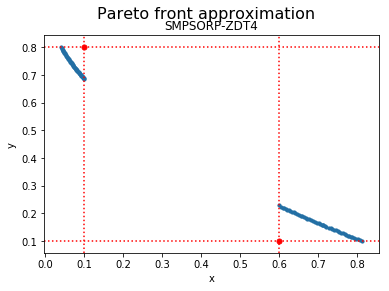

In [3]:
from jmetal.lab.visualization.plotting import Plot
from jmetal.util.solution import get_non_dominated_solutions

front = get_non_dominated_solutions(solutions)

plot_front = Plot(plot_title='Pareto front approximation', axis_labels=['x', 'y'], reference_point=reference_point)
plot_front.plot(front, label='SMPSORP-ZDT4')

### API